In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df=pd.read_csv('dataset w7.csv')

In [3]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [5]:
df.dtypes

Gender              object
Test preparation    object
Total Marks          int64
dtype: object

In [6]:
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

# 1. Carry out descriptive analytics on the dataset.

In [7]:
df.shape

(28, 3)

In [8]:
df.count()

Gender              28
Test preparation    28
Total Marks         28
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

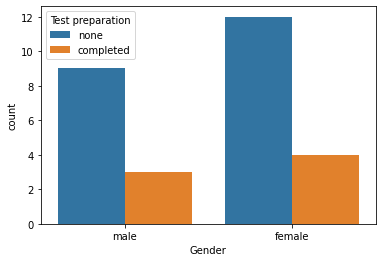

In [9]:
sns.countplot(x='Gender',hue='Test preparation', data=df)

In [12]:
df['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

In [11]:
df.Gender.value_counts()

female    16
male      12
Name: Gender, dtype: int64

In this data female students,who are participated in exam show more a few numbers than male students.
There are only a little number of students who completed their course.

In [20]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


Text(0.5, 1.0, 'Graph of marks basis of gender and test preparation')

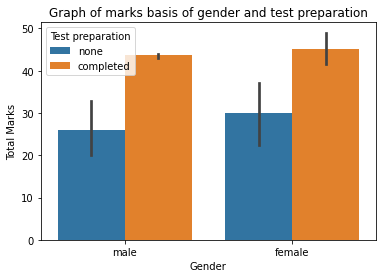

In [21]:
plt.figure()
sns.barplot(x='Gender',y='Total Marks',data=df, hue='Test preparation')
plt.title('Graph of marks basis of gender and test preparation')

In [30]:
df.groupby('Gender')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


# 2.Check whether female and male students scored the same marks.

In [22]:
#Setting Hypothesis

H0: female and male students score the same marks.

H1: female and male students did not score the same marks.

In [23]:
# seperate male and female marks.
male = df[df['Gender']=='male']['Total Marks']
female = df[df['Gender']=='female']['Total Marks']
alpha = .05
# import ttset module
from scipy.stats import ttest_ind

In [24]:
stat,p = ttest_ind(male,female,equal_var=False)
print("p value:",p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value: 0.4906112127110316
Fail to reject H0.


P value is greater than alpha, so it is fail to reject H0, ie accept the null hypothesis ie there is no significant change in the marks of male and female students.

# 3. Whether test preparation helps the students?

In [25]:
alpha=0.05

H0 : Test preparations doesn't help students

H1 : Test preparations helps students

In [26]:
tpn = df[df['Test preparation']=='none']['Total Marks']
tpc = df[df['Test preparation']=='completed']['Total Marks']

In [27]:
stat,p = ttest_ind(tpn,tpc,equal_var=False)
print("p value:",p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value: 4.884790752092096e-06
Reject H0


P value is less than alpha, so reject H0, ie test preparations helps students